In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.dates as mdates

In [2]:
chunks = pd.read_csv('c5.csv', chunksize=100000)
chunk = next(chunks)
chunk.head()


,folio,tipo_entrada,codigo_cierre,delegacion_inicio,sector_inicio,clas_con_f_alarma,incidente_c4,fecha_creacion,fecha_cierre,hora_creacion,hora_cierre,longitud,latitud
0,C5/180717/05027,LLAMADA DEL 911,A,GUSTAVO A. MADERO,Cuautepec,EMERGENCIA,Accidente-Choque sin Lesionados,43298,43298,0.618785,0.683669,-99.13038,19.57932
1,C5/180120/08767,LLAMADA DEL 911,A,GUSTAVO A. MADERO,Cuautepec,EMERGENCIA,Accidente-Choque sin Lesionados,43120,43121,0.893704,0.168958,-99.13003,19.57928
2,C5/181202/05188,LLAMADA DEL 911,A,GUSTAVO A. MADERO,Cuautepec,DELITO,Disturbio-Disparos,43436,43436,0.517917,0.535336,-99.13003,19.57928
3,C5/191205/04043,LLAMADA DEL 911,A,GUSTAVO A. MADERO,Cuautepec,FALTA C?VICA,Administrativas-Ebrios,43804,43804,0.592269,0.655671,-99.13003,19.57928
4,C5/181227/08337,LLAMADA DEL 911,A,GUSTAVO A. MADERO,Cuautepec,EMERGENCIA,Accidente-Choque sin Lesionados,43461,43461,0.925440,0.964167,-99.13127,19.57919


In [3]:
chunk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   folio              100000 non-null  object 
 1   tipo_entrada       100000 non-null  object 
 2   codigo_cierre      100000 non-null  object 
 3   delegacion_inicio  100000 non-null  object 
 4   sector_inicio      100000 non-null  object 
 5   clas_con_f_alarma  100000 non-null  object 
 6   incidente_c4       100000 non-null  object 
 7   fecha_creacion     100000 non-null  int64  
 8   fecha_cierre       100000 non-null  int64  
 9   hora_creacion      100000 non-null  float64
 10  hora_cierre        100000 non-null  float64
 11  longitud           100000 non-null  float64
 12  latitud            100000 non-null  float64
dtypes: float64(4), int64(2), object(7)
memory usage: 9.9+ MB


In [4]:
chunk['incidente_c4'].unique()

array(['Accidente-Choque sin Lesionados', 'Disturbio-Disparos',
       'Administrativas-Ebrios', 'Cad?ver-Abandonado',
       'Agresi?n-Casa Habitaci?n', 'Disturbio-Esc?ndalo',
       'Da?os-Propiedad Ajena', 'Lesionado-Por Golpes-Agresi?n',
       'Agresi?n-Persona', 'Agresi?n-Violencia Intrafamiliar',
       'Robo-Transe?nte', 'Denuncia-Persona Sospechosa',
       'Robo-Veh?culo sin Violencia', 'Disturbio-Fiestas',
       'Disturbio-Quema de Pirotecnia', 'Cad?ver-Suspendido',
       'Robo-Auto partes - Objetos Personales',
       'Lesionado-Por Arma de Fuego', 'Abandono-Veh?culo',
       'Agresi?n-Negocio', 'Administrativas-Drogados', 'Disturbio-Ri?a',
       'Robo-Casa Habitaci?n sin Violencia',
       'Robo-Casa Habitaci?n con Violencia', 'Lesionado-Por Golpes',
       'Agresi?n-Violencia contra la Mujer', 'Lesionado-Por Arma Blanca',
       'Robo-Vehiculo con Violencia', 'Sexuales-Abuso',
       'Privaci?n de la Libertad-Retenci?n de Menores',
       'Robo-Transporte de Carga o Me

In [5]:
filtered_chunks = []
for chunk in pd.read_csv('c5.csv', chunksize=10000):
    filtered_chunk = chunk[chunk['incidente_c4'].isin([
    'Disturbio-Disparos',
    'Cad?ver-Abandonado',
    'Agresi?n-Casa Habitaci?n',
    'Lesionado-Por Golpes-Agresi?n',
    'Agresi?n-Persona',
    'Agresi?n-Violencia Intrafamiliar',
    'Lesionado-Por Arma de Fuego',
    'Cad?ver-Suspendido',
    'Robo-Casa Habitaci?n con Violencia',
    'Lesionado-Por Golpes',
    'Agresi?n-Violencia contra la Mujer',
    'Lesionado-Por Arma Blanca',
    'Robo-Vehiculo con Violencia',
    'Sexuales-Abuso',
    'Privaci?n de la Libertad-Retenci?n de Menores',
    'Cad?ver-Homicidio',
    'Privaci?n de la Libertad-Secuestro',
    'Lesionado-Por Objeto Contuso',
    'Robo-Repartidor',
    'Robo-Pasajero Transporte Publico Microbus',
    'Cad?ver-Muerte Causa Ignorada',
    'Robo-Establecimiento con Violencia',
    'Cad?ver-Arma de Fuego',
    'Lesionado-Polic?a',
    'Sexuales-Violaci?n',
    'Cad?ver-Arma Blanca',
    'Privaci?n de la Libertad-Secuestro Express',
    'Disturbio-Linchamiento',
    'Agresi?n-Servidor P?blico',
    'Robo-Cuentahabiente',
    'Cad?ver-Intoxicaci?n',
    'Robo-Bancos',
    'Cad?ver-Ri?a o Golpes',
    'Cad?ver-Estrangulado'
])]
    filtered_chunks.append(filtered_chunk)

In [6]:
df = pd.concat(filtered_chunks, ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688347 entries, 0 to 688346
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   folio              688347 non-null  object 
 1   tipo_entrada       688347 non-null  object 
 2   codigo_cierre      688347 non-null  object 
 3   delegacion_inicio  688345 non-null  object 
 4   sector_inicio      688347 non-null  object 
 5   clas_con_f_alarma  688347 non-null  object 
 6   incidente_c4       688347 non-null  object 
 7   fecha_creacion     688347 non-null  object 
 8   fecha_cierre       688347 non-null  object 
 9   hora_creacion      688347 non-null  object 
 10  hora_cierre        688347 non-null  object 
 11  longitud           688347 non-null  float64
 12  latitud            688347 non-null  float64
dtypes: float64(2), object(11)
memory usage: 68.3+ MB


In [7]:
# remove none rows
df = df.dropna()

In [8]:
# Eliminate all the rows befor 472700 index
df = df[472700:]

In [9]:
# Step 2: Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['fecha_creacion'])

# Step 3: Extract year and month from 'date'
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Step 4: Create geometry column from longitude and latitude
df['geometry'] = df.apply(lambda row: Point(row['longitud'], row['latitud']), axis=1)

# Step 5: Convert DataFrame to GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry='geometry')

# Step 6: Set coordinate reference system to WGS84
gdf.set_crs(epsg=4326, inplace=True)

# Optional: Read Mexico City shapefile for map overlay (if available)
city_map = gpd.read_file('poligonos_alcaldias_cdmx')

In [10]:
gdf = gpd.clip(gdf, city_map)
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 215544 entries, 575016 to 589877
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   folio              215544 non-null  object        
 1   tipo_entrada       215544 non-null  object        
 2   codigo_cierre      215544 non-null  object        
 3   delegacion_inicio  215544 non-null  object        
 4   sector_inicio      215544 non-null  object        
 5   clas_con_f_alarma  215544 non-null  object        
 6   incidente_c4       215544 non-null  object        
 7   fecha_creacion     215544 non-null  object        
 8   fecha_cierre       215544 non-null  object        
 9   hora_creacion      215544 non-null  object        
 10  hora_cierre        215544 non-null  object        
 11  longitud           215544 non-null  float64       
 12  latitud            215544 non-null  float64       
 13  date               215544 non-null  

In [11]:
# start_date = pd.to_datetime('2020-09-01')
# end_date = pd.to_datetime('2024-11-01')
# gdf = gdf[(gdf['date'] >= start_date) & (gdf['date'] < end_date)]
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 215544 entries, 575016 to 589877
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   folio              215544 non-null  object        
 1   tipo_entrada       215544 non-null  object        
 2   codigo_cierre      215544 non-null  object        
 3   delegacion_inicio  215544 non-null  object        
 4   sector_inicio      215544 non-null  object        
 5   clas_con_f_alarma  215544 non-null  object        
 6   incidente_c4       215544 non-null  object        
 7   fecha_creacion     215544 non-null  object        
 8   fecha_cierre       215544 non-null  object        
 9   hora_creacion      215544 non-null  object        
 10  hora_cierre        215544 non-null  object        
 11  longitud           215544 non-null  float64       
 12  latitud            215544 non-null  float64       
 13  date               215544 non-null  

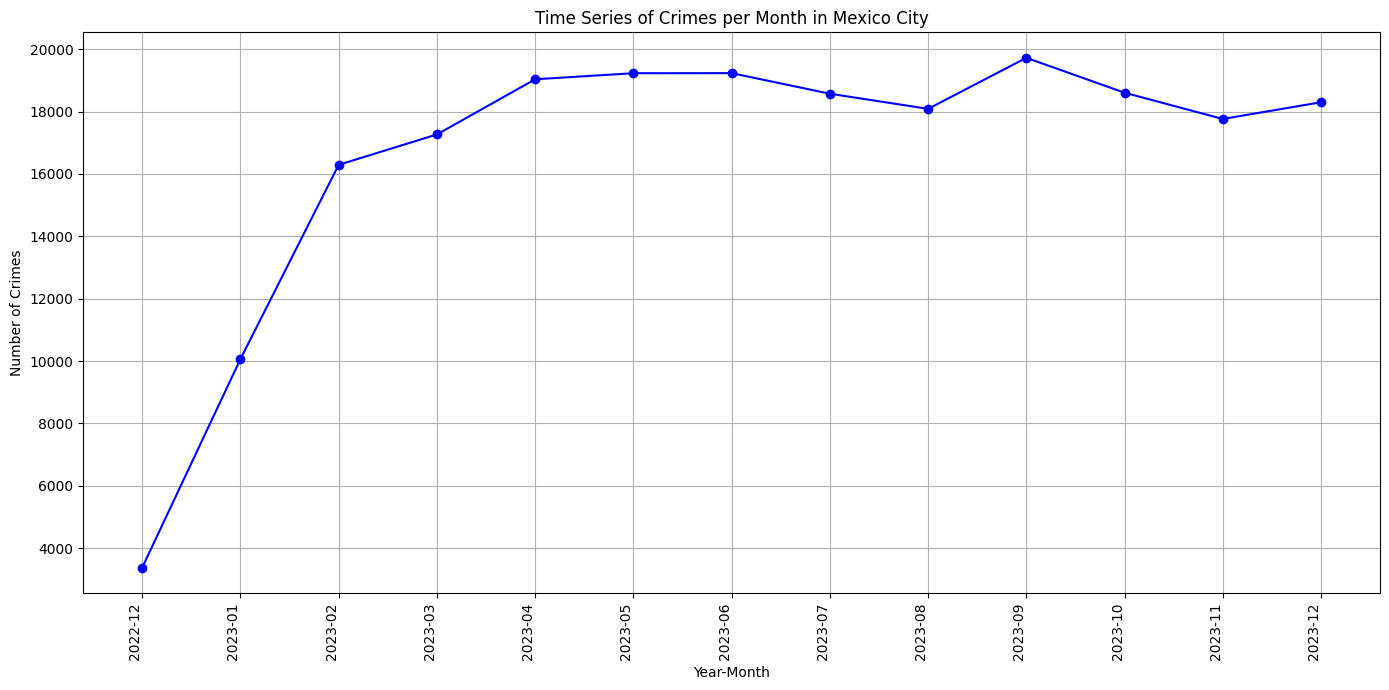

In [12]:
def plot_time_series_crimes_per_month(gdf):
    # Group data by year and month, then count the number of crimes
    gdf['year_month'] = gdf['date'].dt.to_period('M')  # Create a year-month period column
    crime_counts_per_month = gdf.groupby('year_month').size().reset_index(name='crime_count')
    crime_counts_per_month['year_month'] = crime_counts_per_month['year_month'].astype(str)  # Convert to string for plotting

    # Plot the time series
    plt.figure(figsize=(14, 7))
    plt.plot(crime_counts_per_month['year_month'], crime_counts_per_month['crime_count'], marker='o', linestyle='-', color='blue')
    plt.title('Time Series of Crimes per Month in Mexico City')
    plt.xlabel('Year-Month')
    plt.ylabel('Number of Crimes')
    plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
    plt.grid(True)
    plt.tight_layout()  # Adjust layout to prevent clipping
    plt.show()

# Example usage:
plot_time_series_crimes_per_month(gdf)

In [13]:
def analyze_time_series_crimes_per_month(gdf):
    # **Filter data to include dates from June 2019 onwards**
    start_date = pd.to_datetime('2019-06-01')
    end_date = pd.to_datetime('2024-11-01')
    gdf_filtered = gdf[(gdf['date'] >= start_date) & (gdf['date'] < end_date)]
   

    # Group data by year and month, then count the number of crimes
    gdf_filtered['year_month'] = gdf_filtered['date'].dt.to_period('M')  # Create a year-month period column
    crime_counts_per_month = gdf_filtered.groupby('year_month').size().reset_index(name='crime_count')

    # Set 'year_month' as the index
    crime_counts_per_month.set_index('year_month', inplace=True)

    # Ensure the index has a frequency
    crime_counts_per_month.index = crime_counts_per_month.index.to_timestamp()
    crime_counts_per_month = crime_counts_per_month.asfreq('MS')  # 'MS' stands for Month Start

    # Handle missing data by interpolating
    crime_counts_per_month['crime_count'].interpolate(method='linear', inplace=True)

    # Perform seasonal decomposition
    result = seasonal_decompose(crime_counts_per_month['crime_count'], model='multiplicative')

    # Extract the components
    observed = result.observed
    trend = result.trend
    seasonal = result.seasonal
    residual = result.resid

    # Create a figure with four subplots
    fig, axs = plt.subplots(4, 1, figsize=(14, 12), sharex=True)

    # Plot observed data
    axs[0].plot(crime_counts_per_month.index, observed, label='Observed', color='blue')
    axs[0].set_title('Observed')
    axs[0].legend(loc='upper left')

    # Plot trend component
    axs[1].plot(crime_counts_per_month.index, trend, label='Trend', color='orange')
    axs[1].set_title('Trend')
    axs[1].legend(loc='upper left')

    # Plot seasonal component
    axs[2].plot(crime_counts_per_month.index, seasonal, label='Seasonal', color='green')
    axs[2].set_title('Seasonal')
    axs[2].legend(loc='upper left')

    # Plot residuals
    axs[3].plot(crime_counts_per_month.index, residual, label='Residual', color='red')
    axs[3].set_title('Residual')
    axs[3].legend(loc='upper left')

    # Format the x-axis to show months
    locator = mdates.MonthLocator(interval=1)  # Adjust interval if needed
    formatter = mdates.DateFormatter('%Y-%m')

    for ax in axs:
        ax.xaxis.set_major_locator(locator)
        ax.xaxis.set_major_formatter(formatter)
        ax.tick_params(axis='x', rotation=90)

    plt.tight_layout()
    plt.show()

    # Optionally return the decomposition result
    return result

# Example usage:
result = analyze_time_series_crimes_per_month(gdf)

/tmp/ipykernel_320296/3420991960.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  crime_counts_per_month['crime_count'].interpolate(method='linear', inplace=True)


ValueError: x must have 2 complete cycles requires 24 observations. x only has 13 observation(s)

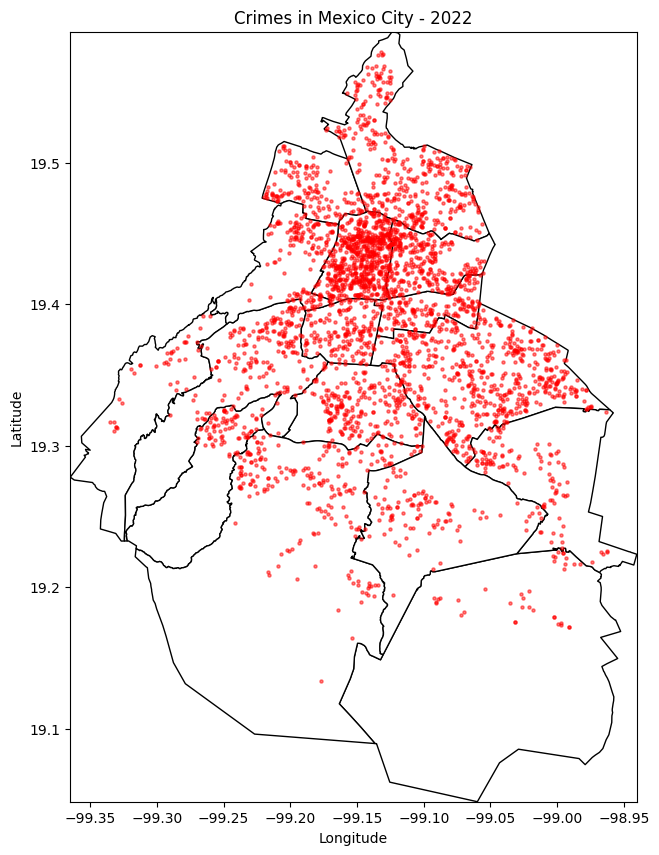

No crime data available for 2022-01.


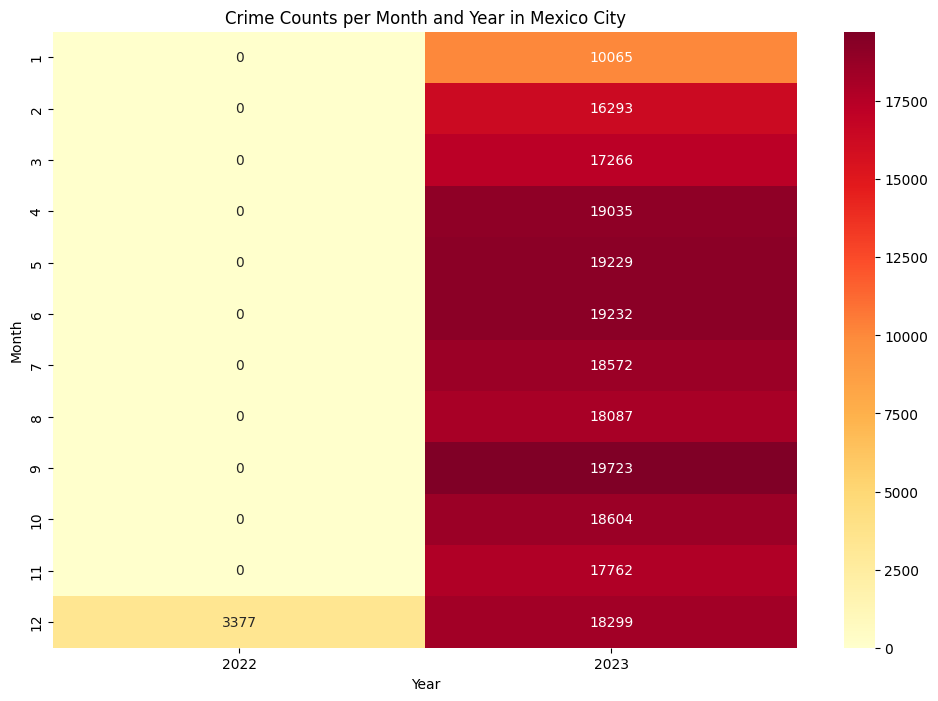

In [14]:
# Function to plot crimes per year
def plot_crimes_by_year(gdf, year):
    # Filter data for the specified year
    gdf_filtered = gdf[gdf['year'] == year]

    if gdf_filtered.empty:
        print(f"No crime data available for {year}.")
        return

    # Ensure both GeoDataFrames are in the same CRS
    if gdf_filtered.crs != city_map.crs:
        gdf_filtered = gdf_filtered.to_crs(city_map.crs)

    # Clip the crime data to the city map extent
    gdf_clipped = gpd.clip(gdf_filtered, city_map)

    if gdf_clipped.empty:
        print(f"No crime data within the city boundaries for {year}.")
        return

    # Plot the city map and crime locations
    fig, ax = plt.subplots(figsize=(10, 10))
    city_map.plot(ax=ax, color='white', edgecolor='black')
    gdf_clipped.plot(ax=ax, marker='o', color='red', markersize=5, alpha=0.5)

    # Set the axis limits to match the city map
    ax.set_xlim(city_map.total_bounds[[0, 2]])
    ax.set_ylim(city_map.total_bounds[[1, 3]])

    plt.title(f'Crimes in Mexico City - {year}')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()

# Function to plot crimes per month and year
def plot_crimes_by_month_year(gdf, year, month):
    # Filter data for the specified year and month
    gdf_filtered = gdf[(gdf['year'] == year) & (gdf['month'] == month)]

    if gdf_filtered.empty:
        print(f"No crime data available for {year}-{month:02d}.")
        return

    # Ensure both GeoDataFrames are in the same CRS
    if gdf_filtered.crs != city_map.crs:
        gdf_filtered = gdf_filtered.to_crs(city_map.crs)

    # Clip the crime data to the city map extent
    gdf_clipped = gpd.clip(gdf_filtered, city_map)

    if gdf_clipped.empty:
        print(f"No crime data within the city boundaries for {year}-{month:02d}.")
        return

    # Plot the city map and crime locations
    fig, ax = plt.subplots(figsize=(10, 10))
    city_map.plot(ax=ax, color='white', edgecolor='black')
    gdf_clipped.plot(ax=ax, marker='o', color='red', markersize=5)

    # Set the axis limits to match the city map
    ax.set_xlim(city_map.total_bounds[[0, 2]])
    ax.set_ylim(city_map.total_bounds[[1, 3]])

    plt.title(f'Crimes in Mexico City - {year}-{month:02d}')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()

# Function to create a heatmap of crime counts per month and year
def plot_crime_heatmap(gdf):
    crime_counts = gdf.groupby(['year', 'month']).size().reset_index(name='counts')
    crime_counts_pivot = crime_counts.pivot(index='month', columns='year', values='counts')

    # Convert the values in crime_counts_pivot to integers, filling NaNs with 0
    crime_counts_pivot = crime_counts_pivot.fillna(0).astype(int)

    plt.figure(figsize=(12, 8))
    sns.heatmap(crime_counts_pivot, annot=True, fmt="d", cmap="YlOrRd")
    plt.title('Crime Counts per Month and Year in Mexico City')
    plt.ylabel('Month')
    plt.xlabel('Year')
    plt.show()

# Example usage:
# Plot crimes for the year 2022
plot_crimes_by_year(gdf, 2022)

# Plot crimes for January 2022
plot_crimes_by_month_year(gdf, 2022, 1)

# Plot heatmap of crime counts
plot_crime_heatmap(gdf)